# LM Studio

 LM Studio is a powerful platform designed for working with large language models (LLMs) on your local machine. It provides an intuitive interface for downloading, managing, and running a wide variety of open-source LLMs.

A few characteristics of LM Studio are:

+ With LM Studio, users can experiment with different models, customize their settings, and interact with them in real time.
+ The platform supports both CPU and GPU acceleration, making it accessible for a range of hardware configurations.
+ LM Studio is ideal for developers, researchers, and enthusiasts who want to explore LLM capabilities without relying on cloud-based solutions.

You can download and install LMStudio from [lmstudio.ai](https://lmstudio.ai/).

## LM Studio API

An important characteristic in LM Studio is its support for OpenAI's API:

+ LM Studio accepts requests on several OpenAI endpoints and returns OpenAI-like response objects ([lmstudio.ai](https://platform.openai.com/docs/guides/prompt-engineering#message-roles-and-instruction-following)).
+ This means that we can reuse our code by pointing the local API using the `base_url` parameter.

## Setup LM Studio

+ Download and install LM Studio from [lmstudio.ai](https://lmstudio.ai/).
+ Start the application.
+ Select a model to load:

    - From the developer tab, you can select a model from the top bar.
    - Select a model, for example, any model from the Qwen3 class of models.
    - Start the server with the control on the top-left labelled "Status: Stopped" or "Status: Running".


<img src="./img/01_lmstudio.png" height="400">


With the setup above, we can point to the local server as indicated below. The API works similarly to OpenAI; however, the underlying model runs locally and was not necessarily produced by OpenAI.

In [1]:
from openai import OpenAI
client = OpenAI(base_url="http://127.0.0.1:1234/v1", api_key="not-needed")

response = client.responses.create(
    model = 'local-model',
    input = 'Hello world!',
)

In [2]:
from IPython.display import display, Markdown

display(Markdown(response.output_text))

Hello, world! 😊  
How can I assist you today? Whether you need help with coding, learning, creativity, or just want to chat — I’m here for it. What’s on your mind?

## Using an Image as Context

There are several ways to interact with the client and use an image as context. They are discussed in the OpenAI platform [documentation](https://platform.openai.com/docs/guides/images-vision?format=base64-encoded#analyze-images). LMStudio inherits this behaviour as shown below.

In [3]:
import base64
# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
# Path to your image
image_path = "./img/00_cat.jpg"

# Getting the Base64 string
base64_image = encode_image(image_path)


response = client.responses.create(
    model="gpt-4.1",
    input=[
        {
            "role": "user",
            "content": [
                { "type": "input_text", "text": "what's in this image?" },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image}",
                },
            ],
        }
    ],
)


''
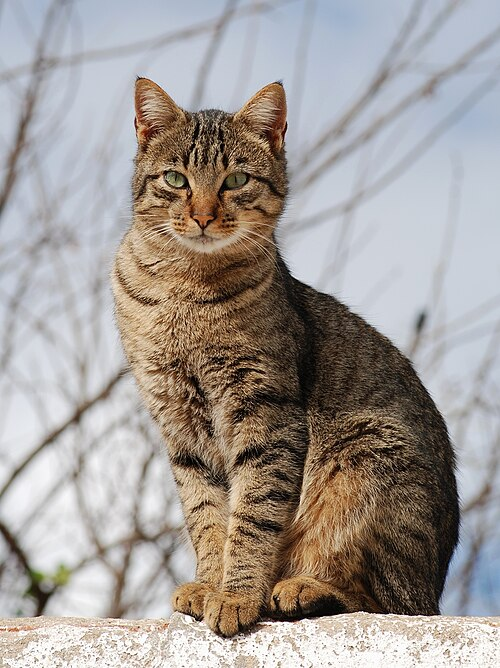

In [4]:
f"data:image/jpeg;base64,{base64_image}"

In [5]:
display(Markdown(response.output_text))

This image features a tabby cat sitting on a textured, light-colored surface, possibly a stone ledge or wall. The cat has a classic tabby pattern with brown, black, and tan stripes and spots, and it has striking green eyes. It is looking directly at the camera with an alert and calm expression. The background consists of out-of-focus bare tree branches against a pale sky, suggesting a natural, outdoor setting during a season like late fall or winter. The lighting is soft and even, highlighting the cat’s fur and features.